## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**0. Load seaborn dataset "tips"**

In [12]:
tips=sns.load_dataset("tips")

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**1. What is the prefered day for eating?**

<AxesSubplot:xlabel='day', ylabel='count'>

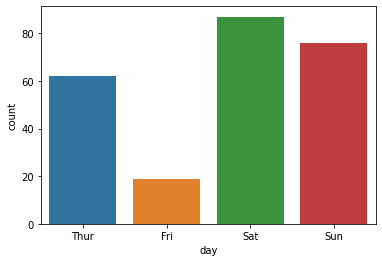

In [13]:
sns.countplot(x=tips.day)

**2. What days of the week has more men than women payers?**

<AxesSubplot:xlabel='day', ylabel='count'>

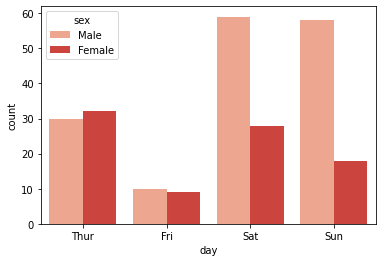

In [19]:
sns.countplot(x=tips.day, hue=tips.sex, palette="Reds")

**3. Do you think bill amounts change considerably depending on smoking?**

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

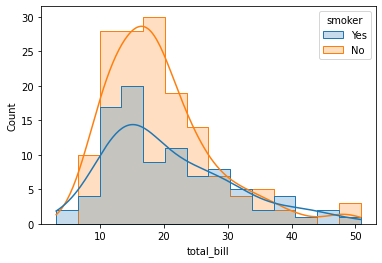

In [20]:
sns.histplot(x=tips.total_bill, hue=tips.smoker, element="step", kde=True)

**4. Is tip correlated to total_bill? Draw a scatter plot**

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

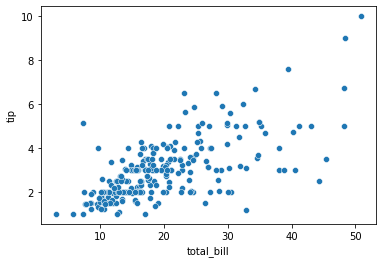

In [21]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

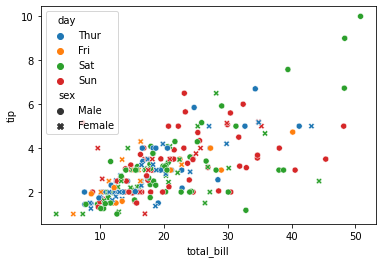

In [23]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="sex", data=tips)